# Project 3. Clustering and Manifold Learning

### Student ID: 916063788
### Student Name: Riddhi Barbhaiya

In [1]:
# Note: Do not change anything

import numpy as np
from numpy import genfromtxt
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
from matplotlib import colors

from mpl_toolkits.mplot3d import Axes3D
from matplotlib.image import imread

import os


%matplotlib inline

## Part 1. Image segmentation

Image segmentation is to divide an image into subparts which show different patterns. For example, the image can be divided into different objects such as the sky, cars, road etc. Or it can be divided into parts with different textures.

Perform a segmentation analysis on the photo data.png (credit to WYM) that can be found in the data folder along with $48$ feature files (each feature contains certain information). Only use the methods learned in the class.

Provide two segmentation plots, each with different emphasis. One is to identify the meaningful objects, the other is to idenity regions with different textures.

Hint: carefully choose the features. Use imshow to plot each feature to explore its effect when it is applied to the image. 

(400, 600, 3)


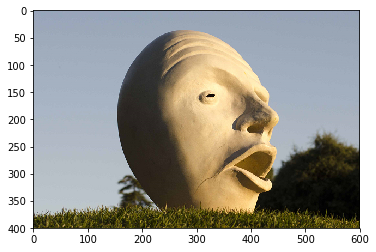

In [2]:
# Load the image and features, plot the image.

# loading the image
image = imread(os.getcwd()+'/Data/data.png')
image = image[:,:,:3]
print(image.shape)
plt.imshow(image)

In [3]:
#loading the features

'''fpath = os.getcwd() + "/Data/Features/"

features = []
for i in range(47):
    fname = "feature" + str(i)
    path = fpath + fname
    features.append(np.array(np.genfromtxt(path,delimiter=',')))
    #print(features[i].shape)
    #plt.imshow(features[i])
    #plt.title(str(i))
    plt.show()
features = np.array(features)
print(features.shape)'''

'fpath = os.getcwd() + "/Data/Features/"\n\nfeatures = []\nfor i in range(47):\n    fname = "feature" + str(i)\n    path = fpath + fname\n    features.append(np.array(np.genfromtxt(path,delimiter=\',\')))\n    #print(features[i].shape)\n    #plt.imshow(features[i])\n    #plt.title(str(i))\n    plt.show()\nfeatures = np.array(features)\nprint(features.shape)'

In [4]:
#loading the features

fpath = os.getcwd() + "/Data/Features/"

features = []
for i in range(47):
    fname = "feature" + str(i)
    path = fpath + fname
    features.append(np.array(np.genfromtxt(path,delimiter=',')))
    #print(features[i].shape)
    #plt.imshow(features[i])
    #plt.title(str(i))
    #plt.show()
features = np.array(features)

imshape = features[0].shape

df = {i:features[i].flatten() for i in range(len(features))}
df[48] = image[:,:,0].flatten()
df[49] = image[:,:,1].flatten()
df[50] = image[:,:,2].flatten()
df[51] = np.dot(image,[0.2989, 0.5870, 0.1140]).flatten()

df= pd.DataFrame(df)

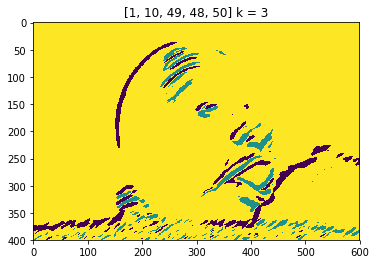

In [5]:
# Identify the objects

from sklearn.decomposition import PCA
import sklearn.cluster as sklc


l = [1,10,49,48,50]
objdf = df[l]
k = 3
objSeg = sklc.KMeans(n_clusters=k).fit(objdf)
objLabels = objSeg.labels_
seg1 = objLabels.reshape(imshape[0],imshape[1])
plt.imshow(seg1)
plt.title(str(l) + " k = " + str(k))
plt.show()

# this segmentation essentially allows us to see the borders of the head, grass, and bush.



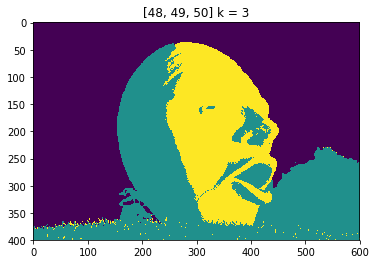

In [6]:
# Identify the parts with different textures


l = [48,49,50]
#l = [46,51,49,48]
objdf = df[l]
k = 3
objSeg = sklc.KMeans(n_clusters=k).fit(objdf)
objLabels = objSeg.labels_
seg1 = objLabels.reshape(imshape[0],imshape[1])
plt.imshow(seg1)
plt.title(str(l) + " k = " + str(k))
plt.show()

## this segmentation identifies the different textures of the grass, sky, and the face of the egg head. 
## Due to the shadow of head, it says that the shadow has the same texture as the class


## Part 2. mean-shift path

Plot the mean shift path for the attached dataset mean_shift.csv.

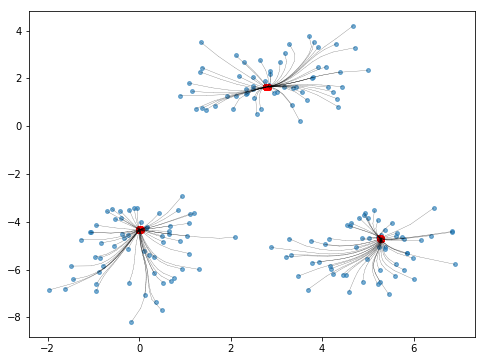

In [7]:
data = np.genfromtxt("./Data/mean_shift.csv",delimiter=',')

## Referenced the lecture code
psi = lambda x,c: np.exp(-c * np.sum(np.square(x)))

def new_point(oldPoint,tuning,otherPoints):
    w = np.array([psi(np.array(oldPoint) - point,tuning) for point in otherPoints])
    wsum = np.sum(w)
    nz = np.array([(i/wsum) * np.array(j) for i,j in zip(w,otherPoints)])
    z = np.sum(nz, axis=0)
    return z

bandwidth = 1
tuning = 1/bandwidth**2
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
ax.scatter(data[:, 0], data[:, 1], alpha=0.6, s=15)
for point in data:
    not_converge = True
    oldPoint = point
    i = 0
    while not_converge:
        i += 1
        #print(i)
        newPoint = new_point(oldPoint,tuning,data)
        ax.plot([oldPoint[0], newPoint[0]], [oldPoint[1], newPoint[1]], color='black', linewidth=0.3, alpha=0.6)
        not_converge = np.sum(np.square(oldPoint - newPoint)) > 0.0001
        if not not_converge:
            ax.scatter(newPoint[0], newPoint[1], color='red', marker='o', s=30)
        oldPoint = newPoint
    
plt.show()

## Part 3. Comparing different clustering methods

Perform clustering on the dataset comparing_cluster_methods.csv. Use DBSCAN, k-means and mean shift. Plot separately and compare the results. Find the methods that are able to seperate the three clusters (of course in order to get a "perfect" result, one needs to find a good tuning parameter by trial-and-error...), and explain why they are able to do so and why the remaining methods are not able to.

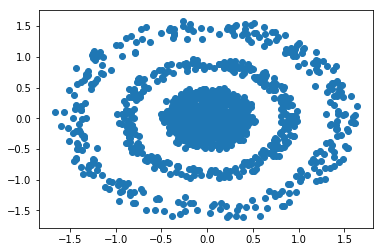

In [8]:
## plot the data
cdata = np.genfromtxt("./data/comparing_cluster_methods.csv",delimiter=',')

plt.scatter(cdata[:,0], cdata[:,1])


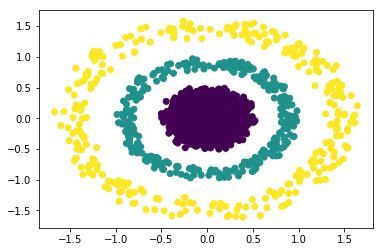

In [9]:
# Plot the result from DBSCAN

import sklearn.cluster as sklc

dbClust = sklc.DBSCAN(eps=0.2, min_samples=4).fit(cdata)
labelsdb = dbClust.labels_
plt.scatter(cdata[:,0], cdata[:,1], c=labelsdb)

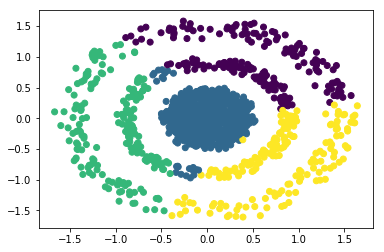

In [10]:
# Plot the result from k-means

kmClust = sklc.KMeans(n_clusters=4,n_init=20).fit(cdata)
kmLabels = kmClust.labels_
plt.scatter(cdata[:,0], cdata[:,1], c=kmClust.labels_)

44


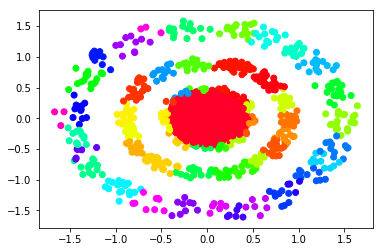

In [11]:
# Plot the result from mean shift


msClust = sklc.MeanShift(bandwidth=0.176).fit(cdata)
msLabels = msClust.labels_
print(np.max(msLabels))
plt.scatter(cdata[:,0], cdata[:,1], c=msLabels, cmap='gist_rainbow')
plt.show()



Q: Compare the three methods and analyze their performance on this dataset.

A: Looking at the data, the natural clustering is to make three clusters for each of the rings. Only DBSCAN does this. If the density of points around the rings was tighter, the mean shift performance could also improve. Kmeans does poorly in this task because it relies on euclidean distances between points. The points could belong to the same ring but be "far" from each other. This hinders the clustering performance of kmean on this data

## Part 4. Manifold learning

Use any method to recover the shape of datasets 1~5. Provide the methods and describe the discovered shape by both plots and words. The datasets are ranked by difficulty.

Hint: The viewing angle in 3d plots in Python can be changed. This allows for having a better visual impression.

Hint: MDS and locally linear embedding are the ways to go for higher dimensional data.

Dataset 1.

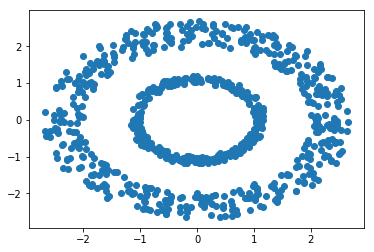

In [12]:
# Plot
import sklearn.manifold as sklm
data1 = np.genfromtxt("./data/dataset1.csv",delimiter=',')
plt.scatter(data1[:,0],data1[:,1])

Description:

Dataset 1 consists of two rings. One smaller ring is inside another bigger ring.

Dataset 2.

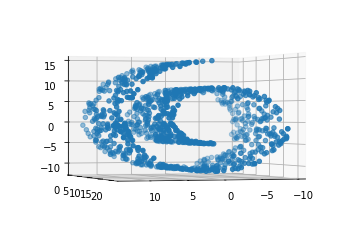

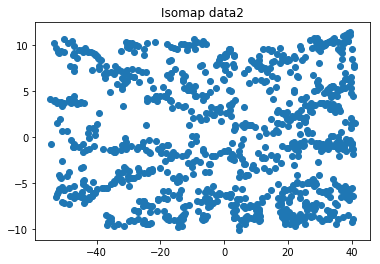

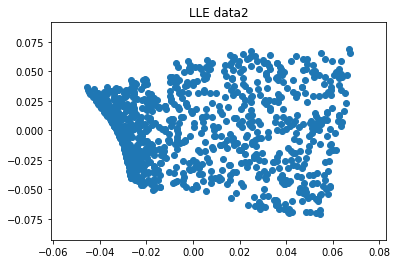

In [13]:
# Plot
data2 = np.genfromtxt("./data/dataset2.csv",delimiter=',')
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
x,y,z = data2[:,0],  data2[:,1],  data2[:,2]
ax.scatter(x,y,z)
ax.view_init(0, 72)
plt.show()

embedding2 = sklm.Isomap(n_components=2, n_neighbors=7)
isomap2 = embedding2.fit_transform(data2)
plt.scatter(isomap2[:,0],isomap2[:,1])
plt.title("Isomap data2")
plt.show()

embedding2 = sklm.LocallyLinearEmbedding(n_components=2,n_neighbors=14)
trans2 = embedding2.fit_transform(data2)
plt.scatter(trans2[:,0],trans2[:,1])
plt.title("LLE data2")
plt.show()

Description:
The data is essentially a swiss roll shape in 3d. Isomap shows that it is a plane in 2d and lle furter specifies that it is a plane with boundries in 2d.

Dataset 3.

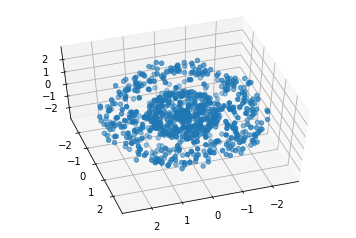

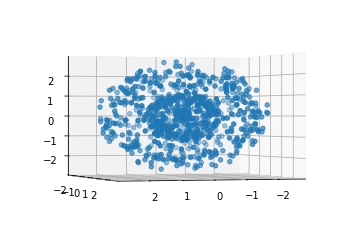

In [14]:
# Plot
data3 = np.genfromtxt("./data/dataset3.csv",delimiter=',')

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
x,y,z = data3[:,0],  data3[:,1],  data3[:,2]
ax.scatter(x,y,z)
ax.view_init(55, 72)
plt.show()


fig1 = plt.figure()
ax1 = fig1.add_subplot(111,projection='3d')
x,y,z = data3[:,0],  data3[:,1],  data3[:,2]
ax1.scatter(x,y,z)
ax1.view_init(0, 72)
plt.show()


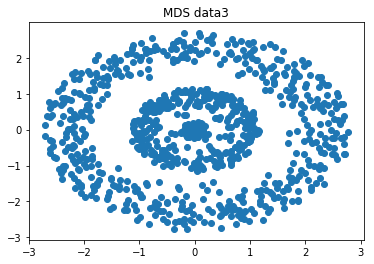

In [15]:
embedding = sklm.MDS(n_components=2,metric=True)
trans = embedding.fit_transform(data3)
plt.scatter(trans[:,0],trans[:,1])
plt.title("MDS data3")
plt.show()

Description:

From the three plots above, the data seems like three concentric spheres. The MDS results show three concentric rings which is expected if the data is as described.

Dataset 4.

[71.075 10.652  0.     0.     0.     0.     0.     0.     0.   ]


Text(0.5,1,'PCA data4')

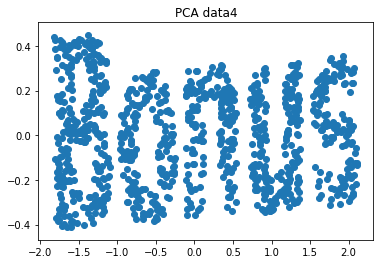

In [16]:
# Plot
data4 = np.genfromtxt("./data/dataset4.csv",delimiter=',')
# this data has too many features to visualize without a reduction method
u,s,vh = np.linalg.svd(data4)
print(np.round(s,3))
#only two features are linearly independant.
from sklearn.decomposition import PCA
pcaTrans = PCA(n_components=2).fit_transform(data4)
plt.scatter(pcaTrans[:,0],pcaTrans[:,1])
plt.title("PCA data4")


Description:
Only 2 of the features are linearly independant. If we do PCA and plot the features it spells bonus.


Dataset 5.

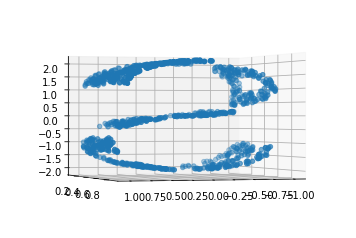

In [17]:
# Plot

data5 = np.genfromtxt("./data/dataset5.csv",delimiter=',')

fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
x,y,z = data5[:,0],  data5[:,1],  data5[:,2]
ax.scatter(x,y,z)
ax.view_init(0, 72)
plt.show()

Text(0.5,1,'PCA data4')

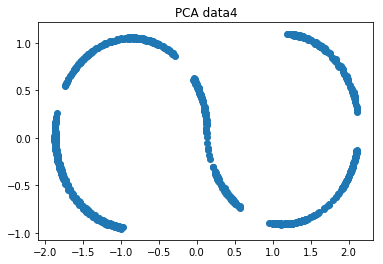

In [18]:
pcaTrans = PCA(n_components=2).fit_transform(data5)
plt.scatter(pcaTrans[:,0],pcaTrans[:,1])
plt.title("PCA data4")

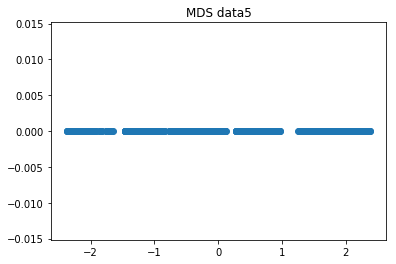

In [19]:
embedding = sklm.MDS(n_components=1,metric=True)
trans = embedding.fit_transform(data5)
plt.scatter(trans[:,0],np.zeros(data5.shape[0]))
plt.title("MDS data5")
plt.show()

Description:
In 3d the data looks like it has an S shape. Looking at the data in 2d, we see that the it resembles a S but has gaps. Lastly, the data essentially lies in five segments on line.


## Part 5. Multi-dimensional Scaling and PCA

This is a continuation problem of the part 5 in project 2. 

- 1. Apply k-means method to data2, with k=7 and save it as data2.csv.
- 2. data2.csv should have 6 columns, data.columns=["x","y","t1","t2","t3","label"]. Put it under the current working folder.
- 3. Use Multi-dimensional Scaling to plot the points in data2, label the clusters by different colors.
- 4. Use PCA to get the first two pc scores and plot them  with different colors indicating different clusters.
- 5. The colors should be the same across methods for the same cluster.

In [20]:
## Apply K-means
data2 = np.genfromtxt("./Data/data2proj2",delimiter=',')


km = sklc.KMeans(n_clusters=7).fit(data2)
labels = km.labels_
labels = labels.reshape((data2.shape[0],1))
data2 = np.concatenate((data2,labels),1)
data2 = pd.DataFrame(data2, columns=["x","y","t1","t2","t3","label"])
data2.to_csv("./data2.csv")

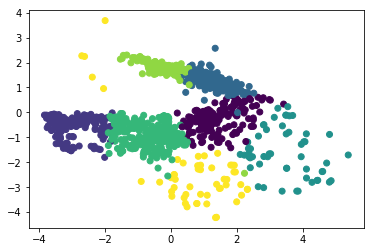

In [21]:
## MDS plot
embedding = sklm.MDS(n_components=2,metric=True)
trans = embedding.fit_transform(data2[["x","y","t1","t2","t3"]])
labels = data2[["label"]].to_numpy()[:,0].astype("int")
plt.scatter(trans[:,0],trans[:,1],c=labels)

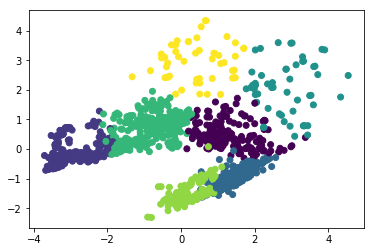

In [22]:
## PCA plot

pcaTrans = PCA(n_components=2).fit_transform(data2[["x","y","t1","t2","t3"]])
plt.scatter(pcaTrans[:,0],pcaTrans[:,1],c=labels)





Q: Comparing the two plots, which one is better? Why?

A: They are only different by rotation/reflection.

# <font color="blue"> Submission Instructions</font>

1. Click the Save button at the top of the Jupyter Notebook.
2. Select Cell -> All Output -> Clear. This will clear all the outputs from all cells (but will keep the content of the cells). 
3. Select Cell -> Run All. This will run all the cells in order, and will take several minutes. <font color='red'>You will not get any grade if you don't follow this step strictly.</font>
4. Once you've rerun everything, select File -> Download as -> PDF via LaTeX
5. Look at the PDF file and make sure all your solutions are there, displayed correctly. The PDF is the only thing your graders will see!
6. Submit your PDF on Gradescope.
7. Pack all the relevant files (Project_3.ipynb, data2.csv) into a zipfile yourfirstname_yourlastname.zip and upload it to Canvas.